# CNN (Convolution Neural Network) with split_sequence

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers

In [3]:
import pandas as pd

# 데이터 파일 경로 설정
file_path = "./seeds_dataset.txt"

# 데이터 파일 읽기
column_names = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'Class']
df = pd.read_csv(file_path, sep='\t', header=None, names=column_names)

df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [4]:
X=df.drop('Class', axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [6]:
y=df['Class']
y.value_counts()

Class
1    70
2    70
3    70
Name: count, dtype: int64

In [7]:
#one hot encoding 하기

y = pd.get_dummies(y).values

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값

y_train.shape
X_test.shape

(53, 7)

In [9]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :7], sequences[end_ix-1, 7:]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [10]:
y_train.shape

(157, 3)

In [11]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
# np.c_ : 배열을 열 방향으로 이어붙인다.
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# 7개의 features와 3개의 label이 합쳐진 train_set, test_set
print(train_set)

[[12.62   13.67    0.8481 ...  0.      0.      1.    ]
 [16.63   15.46    0.8747 ...  1.      0.      0.    ]
 [13.54   13.85    0.8871 ...  1.      0.      0.    ]
 ...
 [19.15   16.45    0.889  ...  0.      1.      0.    ]
 [14.99   14.56    0.8883 ...  1.      0.      0.    ]
 [11.27   12.97    0.8419 ...  0.      0.      1.    ]]


In [12]:
# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(153, 5, 7) (153, 3)
(49, 5, 7) (49, 3)


In [13]:
# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(153, 5, 7) (153, 3)
(49, 5, 7) (49, 3)


In [14]:
# 각각 스텝 수, feature 수, label 수
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
print(n_timesteps, n_features, n_outputs)

5 7 3


In [16]:
X_train.shape[1]

5

In [20]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [21]:
# 신경망 모델 구축
inputs = Input(shape=(n_timesteps, n_features,))

x = Conv1D(32, 2, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x) # 드롭아웃으로 노드 비활성화
x = Flatten()(x)
prediction = Dense(n_outputs, activation='softmax')(x)

model = Model(inputs=inputs, outputs=prediction)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 7)]            0         
                                                                 
 conv1d (Conv1D)             (None, 4, 32)             480       
                                                                 
 dense (Dense)               (None, 4, 64)             2112      
                                                                 
 dropout (Dropout)           (None, 4, 64)             0         
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 3363 (13.14 KB)
Trainable params: 3363 (13.14 

In [23]:
from keras.callbacks import EarlyStopping

# 신경망 훈련, 검증 데이터 전달
#  callbacks = [early_stopping],
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=144, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
2/2 - 0s - loss: 1.4336 - accuracy: 0.3725 - val_loss: 1.0036 - val_accuracy: 0.4694 - 226ms/epoch - 113ms/step
Epoch 2/100
2/2 - 0s - loss: 1.4305 - accuracy: 0.4118 - val_loss: 0.9448 - val_accuracy: 0.5102 - 24ms/epoch - 12ms/step
Epoch 3/100
2/2 - 0s - loss: 1.3043 - accuracy: 0.4510 - val_loss: 0.9198 - val_accuracy: 0.5510 - 23ms/epoch - 12ms/step
Epoch 4/100
2/2 - 0s - loss: 1.3049 - accuracy: 0.4379 - val_loss: 0.9207 - val_accuracy: 0.5918 - 23ms/epoch - 12ms/step
Epoch 5/100
2/2 - 0s - loss: 1.2591 - accuracy: 0.3987 - val_loss: 0.9279 - val_accuracy: 0.5714 - 23ms/epoch - 12ms/step
Epoch 6/100
2/2 - 0s - loss: 1.3765 - accuracy: 0.4118 - val_loss: 0.9208 - val_accuracy: 0.5918 - 21ms/epoch - 11ms/step
Epoch 7/100
2/2 - 0s - loss: 1.3179 - accuracy: 0.3987 - val_loss: 0.9043 - val_accuracy: 0.6327 - 22ms/epoch - 11ms/step
Epoch 8/100
2/2 - 0s - loss: 1.0954 - accuracy: 0.5033 - val_loss: 0.9036 - val_accuracy: 0.5918 - 23ms/epoch - 12ms/step
Epoch 9/100
2/2 - 0s -

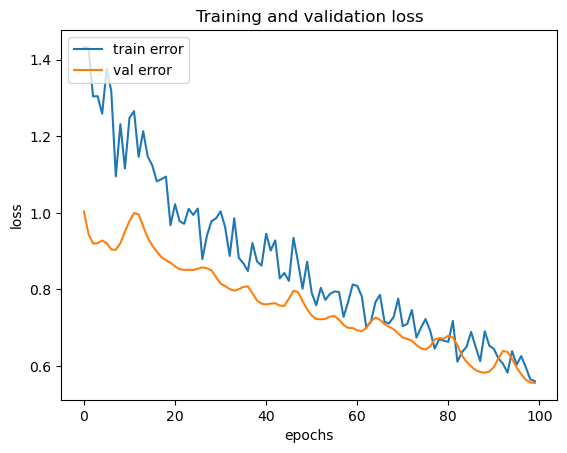

In [24]:
# 훈련 데이터와 손실값의 검증 데이터의 손실값을 그래프에 출력

history_dict = history.history
loss_values = history_dict['loss'] # 훈련 데이터 손실 값
val_loss_values = history_dict['val_loss'] # 검증 데이터 손실 값
acc = history_dict['accuracy'] # 정확도
epochs = range(1, len(acc) + 1) # 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()